## Introduction 

This project aims to develop a machine learning model that predicts whether a customer will leave Beta Bank soon. Using data on clients' past behavior and contract terminations, the project seeks to identify patterns that indicate a customer's likelihood of churning.

The classification model will be optimized for the highest possible F1 score, aiming for a target of at least 0.59 on a test dataset. The F1 score balances precision and recall, making it an essential metric for evaluating performance with imbalanced data. The model will also be assessed using the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) metric.

By accurately predicting customer churn, Beta Bank can improve retention and loyalty, ultimately reducing costs associated with acquiring new customers and enhancing overall profitability.

## Data Cleaning

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
from sklearn.utils import resample

#import machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#import metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

#import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/datasets/Churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
#check for duplicates
df.duplicated().sum()

0

In [5]:
#Checking for duplicates in the customer id column
df['CustomerId'].duplicated().sum()

0

In [6]:
#Check for null values in the dataframe
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

From the findings above we see that the column Tenure has 909 null values

In [7]:
#check what values are in Tenure column
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

After doing value counts we see all numbers from 0-10 is used in the dataset. Since the true number for the customers is unknown we will just fill the missing values with -1.

In [8]:
#filling the missing values with -1
df.fillna(-1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Data Visualization

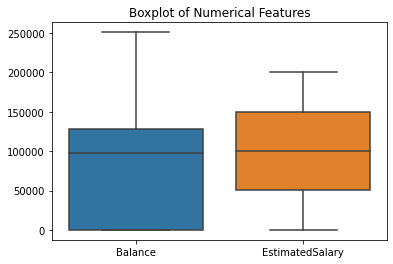

In [9]:
# Create boxplots for numerical features
sns.boxplot(data=df[['Balance', 'EstimatedSalary']])
plt.title('Boxplot of Numerical Features')
plt.show()

From the graph above we see boxplot of the balance of customers vs Estimated Salary. Tha balances of customers range from 0 dollars to about 250,000 dollars  while the salary ranges from 0 to about 200,000 dollars with the majority ranging between 50,000 and 150,000 dollars.

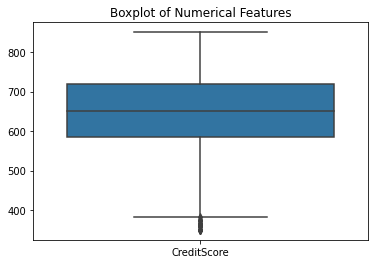

In [10]:
# Create boxplots for numerical features
sns.boxplot(data=df[['CreditScore']])
plt.title('Boxplot of Numerical Features')
plt.show()

Looking at the credit score we see that majority of the customers credit score range from about 600 - 700. with some as low as below 400 and some as high as 850.

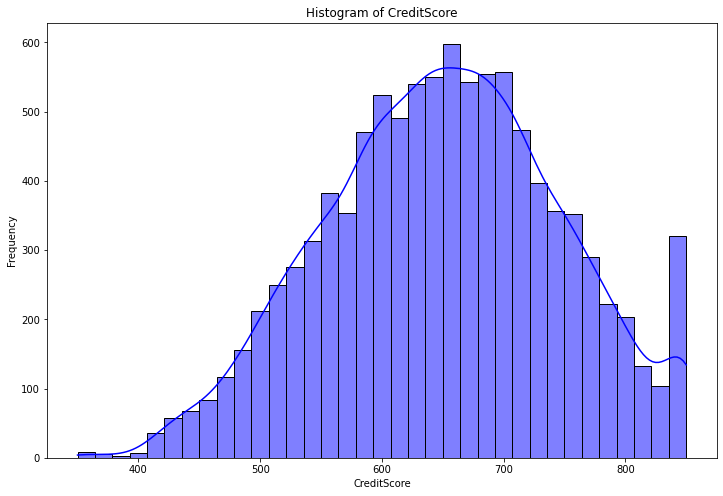

In [11]:
plt.figure(figsize=(12, 8))
# Plot a histogram of the CreditScore feature using Seaborn
sns.histplot(data=df, x='CreditScore', bins=35, kde=True, color='blue')

# Add title and labels
plt.title('Histogram of CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

# Display the plot
plt.show() 

from the histogram above we see that the majority of customers have credit scores from about 600-700, with the numbers decreasing as it it approaches 800, then a huge spike at around 850. 

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


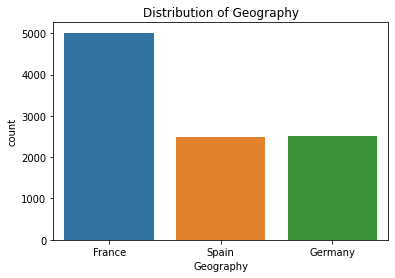

In [12]:
# Create bar chart for Geography
print(df['Geography'].value_counts())
sns.countplot(x='Geography', data=df)
plt.title('Distribution of Geography')
plt.show()

From the graoh above we see that majority of the customers are from France, in second place is Germany with Spain coming in third.

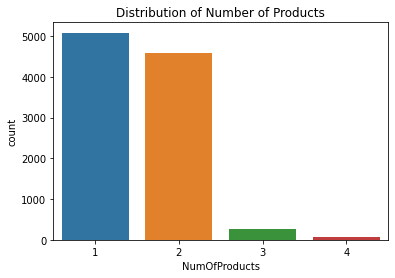

In [13]:
# Create bar chart for NumOfProducts
sns.countplot(x='NumOfProducts', data=df)
plt.title('Distribution of Number of Products')
plt.show()

The graph above shows that the majority of customers use only one product, followed by 2, 3, and 4 respectively.

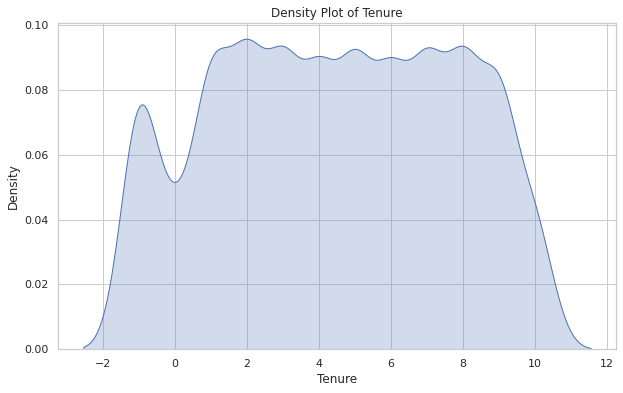

In [14]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a density plot of the 'Tenure' feature
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Tenure'], shade=True)
plt.title('Density Plot of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.show()

From the graph above we see that the tenure is pretty balanced/ equally distributed among all customers with the only odd one out being the new category that was created with the null values.

Male      5457
Female    4543
Name: Gender, dtype: int64


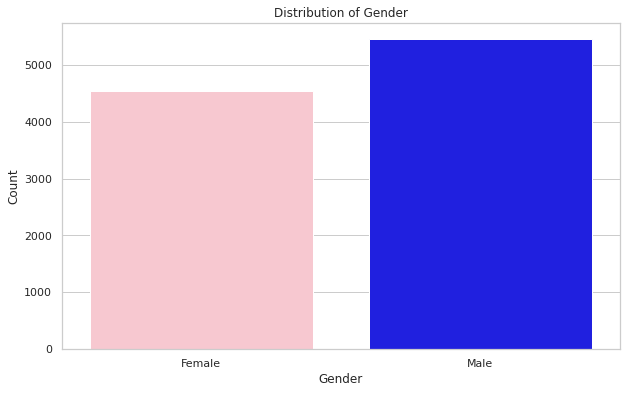

In [15]:
#plot Distribution of Gender
print(df['Gender'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, palette={'Male': 'blue', 'Female': 'pink'})

# Add title and labels
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

The graph above shows that majority of the customers are Males with a count of 5457, while females are 4543.

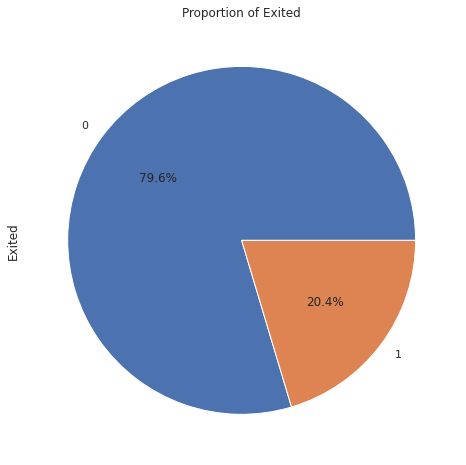

In [16]:
# Plot pie chart for the target variable Exited
plt.figure(figsize=(12, 8))
df['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Exited')
plt.show()

Assuming 0 means no and 1 means yes. From the graph above we see that of all the customers 20.4% exited the bank and the remaining 79.6% remains with the bank.

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64


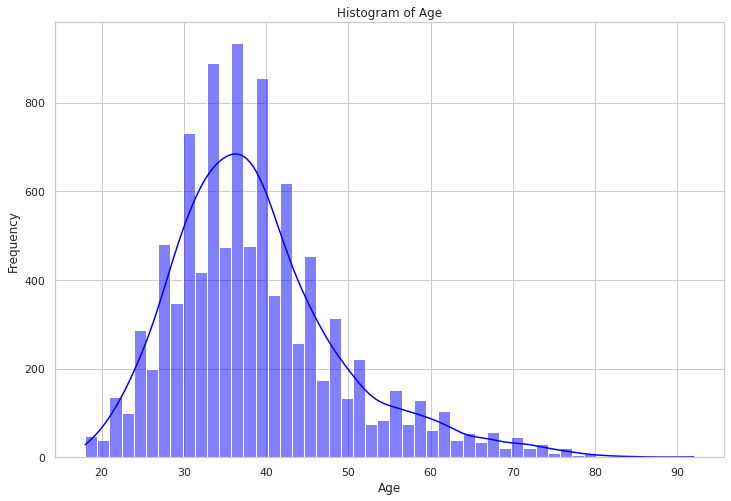

In [17]:
print(df['Age'].value_counts())

plt.figure(figsize=(12, 8))
# Plot a histogram of the CreditScore feature using Seaborn
sns.histplot(data=df, x='Age', bins=50, kde=True, color='blue')

# Add title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

From the graph above we see that the mojority of customers fall between the ages of 30 and 50 with some customers as old as in their 90's.

In [18]:
# Convert all categorical columns in the DataFrame to one-hot encoded columns, dropping the first category
df_encoded = pd.get_dummies(df[['Geography', 'Gender']])

# Display the first few rows of the encoded DataFrame
df_encoded

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0
...,...,...,...,...,...
9995,1,0,0,0,1
9996,1,0,0,0,1
9997,1,0,0,1,0
9998,0,1,0,0,1


In [19]:
# Drop 'Geography' and 'Gender' columns from the original DataFrame
df = df.drop(['Geography', 'Gender'], axis=1)

# Concatenate df_encoded to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5.0,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10.0,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,15584532,Liu,709,36,7.0,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772,42,3.0,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [20]:
#dropping string column surname.
df_update = df.drop(['Surname'], axis=1)

## Splitting the Data

In [21]:
# Split data frame into train, valid, and test dataframes in a 3:1:1 ratio

train_df, temp_df = train_test_split(df_update, test_size=0.4, random_state=6248)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=6248)

print(f"Shape of the train dataframe: {train_df.shape}")
print(f"Shape of valid dataframe: {valid_df.shape}")
print(f"Shape of Test dataframe: {test_df.shape}")

Shape of the train dataframe: (6000, 16)
Shape of valid dataframe: (2000, 16)
Shape of Test dataframe: (2000, 16)


In [22]:
#creating feature and target for each dataframes also known as X and y
train_features, train_target = train_df.drop(['Exited'], axis=1), train_df['Exited']
valid_features, valid_target = valid_df.drop(['Exited'], axis=1), valid_df['Exited']
test_features, test_target = test_df.drop(['Exited'], axis=1), test_df['Exited']

After splitting the data in a 3:1:1 ratio, the features and tareget for each is created.

In [23]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the training features
train_features_scaled = scaler.fit_transform(train_features)

# Transform the validation and test features using the same scaler
valid_features_scaled = scaler.transform(valid_features)
test_features_scaled = scaler.transform(test_features)

After splitting your data into training, validation, and test sets, we scale the features to standardize their values. 

### Checking classes

0    4776
1    1224
Name: Exited, dtype: int64


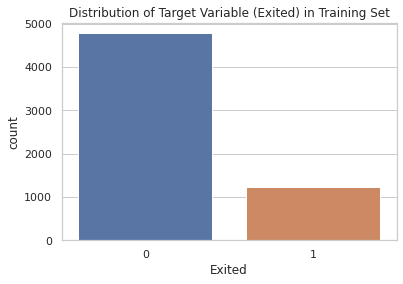

In [24]:
# Check the balance of classes in the target variable
class_distribution = train_target.value_counts()
print(class_distribution)

# Plotting class distribution
sns.countplot(x='Exited', data=train_df)
plt.title('Distribution of Target Variable (Exited) in Training Set')
plt.show()

Here we see an imbalanced of classes. There are alot more 0 class than 1. This can vastly affect the F1 score.

## Train models with imbalanced classes

### Logistic Regression with imbalanced data

Accuracy: 0.8290
F1 Score: 0.3547


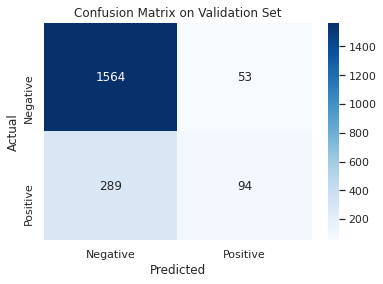

In [25]:
# Create the logistic regression model withoud considering imbalance
lr_imbalanced = LogisticRegression(random_state=48, solver='liblinear')
# Train the model on the training data
lr_imbalanced.fit(train_features_scaled, train_target)

# Predict on the validation data
valid_predictions_lr = lr_imbalanced.predict(valid_features_scaled)

# Calculate metrics
accuracy = accuracy_score(valid_target, valid_predictions_lr)
f1 = f1_score(valid_target, valid_predictions_lr)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(valid_target, valid_predictions_lr)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix on Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

With the logistic regression, while the accuracy came out high the f1 score came out very poorly and thus cannot be used.

### Decision Tree with imbalanced data

Best model (with max_depth=6):
F1 score of the best model: 0.5880452342487883


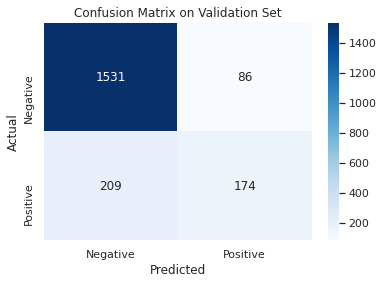

In [26]:
best_model = None
best_result = 0

# Loop through the depth range and find the best model
for depth in range(1, 8):
    # Create a Decision Tree model with the given depth
    tree_model = DecisionTreeClassifier(random_state=48, max_depth=depth)
    # Train the model using the scaled training features
    tree_model.fit(train_features_scaled, train_target)
    # Get the model's predictions for the scaled validation features
    tree_predictions = tree_model.predict(valid_features_scaled)
    # Calculate the F1 score
    result = f1_score(valid_target, tree_predictions)
    # Update the best model and result if necessary
    if result > best_result:
        best_model = tree_model
        best_result = result
# Print the best model and its performance metrics
print("Best model (with max_depth={}):".format(best_model.max_depth))
print("F1 score of the best model:", best_result)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(valid_target, tree_predictions)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix on Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree seem to handle imbalanced data a lot better than the Logistic regression model. Its f1 score came out as 0.588 which is a vast improvement.

### Random Forest with imbalanced classes

F1 score of the best random forest model on the validation set (n_estimators = 11): 0.5900621118012424


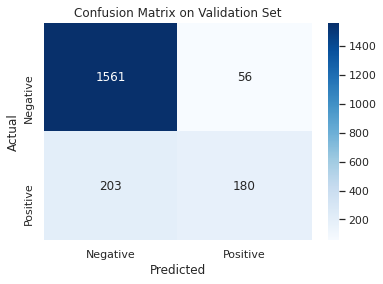

In [27]:
#training Random Forest model
best_model = None
best_score = 0
best_est = 0

# Hyperparameter tuning for number of trees in the forest
for est in range(1, 33):
    # Create a Random Forest model with the specified number of trees
    forest_model = RandomForestClassifier(random_state=48, n_estimators=est)
    # Train the model on the training set
    forest_model.fit(train_features_scaled, train_target)
    # Get model predictions on the validation set
    valid_predictions = forest_model.predict(valid_features_scaled)
    # Calculate the F1 score
    score = f1_score(valid_target, valid_predictions)
    # If the current model has a better score, update the best model and score
    if score > best_score:
        best_score = score
        best_est = est
        best_model = forest_model
print(f"F1 score of the best random forest model on the validation set (n_estimators = {best_est}): {best_score}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(valid_target, valid_predictions)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix on Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Train model with weighted classes

### Logistic Regression with weighted classes

Accuracy: 0.7215
F1 Score: 0.5058


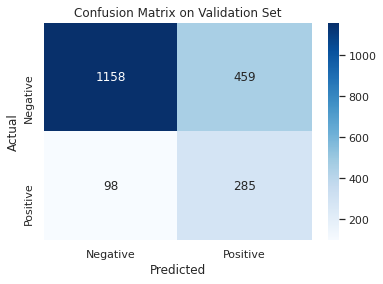

In [28]:
# Create the logistic regression model withoud considering imbalance
lr_weighted = LogisticRegression(random_state=48, solver='liblinear', class_weight='balanced')
# Train the model on the training data
lr_weighted.fit(train_features_scaled, train_target)

# Predict on the validation data
valid_predictions_lr_weighted = lr_weighted.predict(valid_features_scaled)

# Calculate metrics
accuracy = accuracy_score(valid_target, valid_predictions_lr_weighted)
f1 = f1_score(valid_target, valid_predictions_lr_weighted)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(valid_target, valid_predictions_lr_weighted)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix on Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Here we see a vast improvement in the performance of the logistic regression model. with and f1 score of 0.5058

### Decision Tree with weighted classes

Best model (with max_depth=6):
F1 score of the best model: 0.5864509605662285


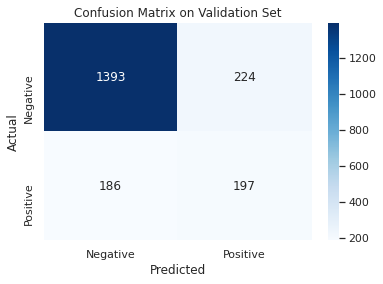

In [29]:
best_model = None
best_result = 0

# Loop through the depth range and find the best model
for depth in range(1, 29):
    # Create a Decision Tree model with the given depth
    tree_model_weighted = DecisionTreeClassifier(random_state=48, max_depth=depth, class_weight='balanced')
    # Train the model using the scaled training features
    tree_model_weighted.fit(train_features_scaled, train_target)
    # Get the model's predictions for the scaled validation features
    tree_predictions_weighted = tree_model_weighted.predict(valid_features_scaled)
    # Calculate the F1 score
    result = f1_score(valid_target, tree_predictions_weighted)
    # Update the best model and result if necessary
    if result > best_result:
        best_model = tree_model_weighted
        best_result = result
# Print the best model and its performance metrics
print("Best model (with max_depth={}):".format(best_model.max_depth))
print("F1 score of the best model:", best_result)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(valid_target, tree_predictions_weighted)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix on Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random forest with weighted classes

F1 score of the best random forest model on the validation set (n_estimators = 19): 0.5641838351822505


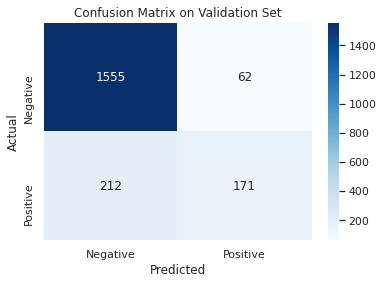

In [30]:
#training Random Forest model
best_model = None
best_score = 0
best_est = 0

# Hyperparameter tuning for number of trees in the forest
for est in range(1, 29):
    # Create a Random Forest model with the specified number of trees
    forest_model_weighted = RandomForestClassifier(random_state=48, n_estimators=est, class_weight='balanced')
    # Train the model on the training set
    forest_model_weighted.fit(train_features_scaled, train_target)
    # Get model predictions on the validation set
    valid_predictions_weightedrf = forest_model_weighted.predict(valid_features_scaled)
    # Calculate the F1 score
    score = f1_score(valid_target, valid_predictions_weightedrf)
    # If the current model has a better score, update the best model and score
    if score > best_score:
        best_score = score
        best_est = est
        best_model = forest_model
        
print(f"F1 score of the best random forest model on the validation set (n_estimators = {best_est}): {best_score}")
# Calculate the confusion matrix
conf_matrix = confusion_matrix(valid_target, valid_predictions_weightedrf)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix on Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Create an upsample function handle imbalanced data

In [31]:
def upsample(train_features, train_target, random_state=48):
    # Separate majority and minority classes
    majority_features = train_features[train_target == 0]
    majority_target = train_target[train_target == 0]

    minority_features = train_features[train_target == 1]
    minority_target = train_target[train_target == 1]

    # Perform random oversampling on the minority class
    minority_features_upsampled, minority_target_upsampled = resample(
        minority_features, minority_target,
        replace=True,  # Sample with replacement
        n_samples=len(majority_target),  # Match number in majority class
        random_state=random_state  # For reproducibility
    )

    # Combine the upsampled minority class with the majority class
    upsampled_features = pd.concat([majority_features, minority_features_upsampled])
    upsampled_target = pd.concat([majority_target, minority_target_upsampled])

    # Shuffle the data to mix the samples
    upsampled_features, upsampled_target = shuffle(upsampled_features, upsampled_target, random_state=random_state)

    return upsampled_features, upsampled_target

### Logistic Regression

F1 score on validation set: 0.3442
ROC AUC score on validation set: 0.5698


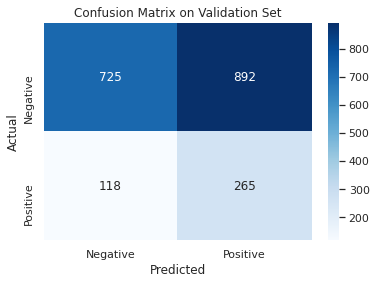

In [32]:
# Upsample the training data using the provided function
upsampled_train_features, upsampled_train_target = upsample(train_features, train_target, random_state=48)

# Initialize the logistic regression model
lr_upsampled = LogisticRegression()

# Train the model using the upsampled data
lr_upsampled.fit(upsampled_train_features, upsampled_train_target)

# Predict on the validation set
valid_predictions_lr_sampled = lr_upsampled.predict(valid_features)
valid_probabilities = lr_upsampled.predict_proba(valid_features)[:, 1]

# Calculate performance metrics on the validation set
valid_f1 = f1_score(valid_target, valid_predictions_lr_sampled)
valid_roc_auc = roc_auc_score(valid_target, valid_probabilities)

print(f"F1 score on validation set: {valid_f1:.4f}")
print(f"ROC AUC score on validation set: {valid_roc_auc:.4f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(valid_target, valid_predictions_lr_sampled)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix on Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Tree

Best model (with max_depth=4):
F1 score of the best model: 0.4067796610169491


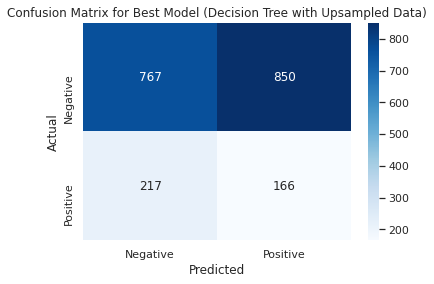

In [33]:
# Upsample the training data
upsampled_train_features, upsampled_train_target = upsample(train_features, train_target, random_state=48)

best_model = None
best_result = 0

# Loop through the depth range and find the best model
for depth in range(1, 17):
    # Create a Decision Tree model with the given depth
    tree_model_upsampled = DecisionTreeClassifier(random_state=77, max_depth=depth)
    # Train the model using the upsampled features and target data
    tree_model_upsampled.fit(upsampled_train_features, upsampled_train_target)
    # Get the model's predictions for the scaled validation features
    tree_predictions_upsampled = tree_model_upsampled.predict(valid_features_scaled)
    # Calculate the F1 score on the validation set
    result = f1_score(valid_target, tree_predictions_upsampled)
    # Update the best model and result if necessary
    if result > best_result:
        best_model = tree_model_upsampled
        best_result = result

# Print the best model and its performance metrics
print(f"Best model (with max_depth={best_model.max_depth}):")
print("F1 score of the best model:", best_result)

# Calculate the confusion matrix for the best model
conf_matrix = confusion_matrix(valid_target, tree_predictions_upsampled)

# Plot the heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Best Model (Decision Tree with Upsampled Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest

Best F1 Score: 0.5971
Number of estimators for best F1 score: 37


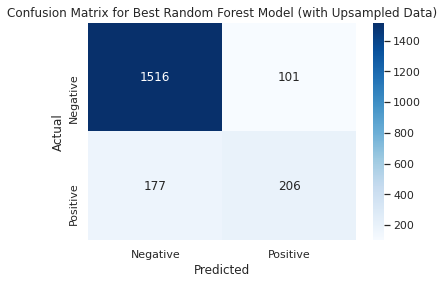

In [34]:
best_f1_score = 0
best_est = 0
best_forest_model = None
# Choose hyperparameter range
for est in range(1, 48):
    # Set the number of trees
    forest_model = RandomForestClassifier(random_state=48, n_estimators=est)
    # Train the model on the upsampled training set
    forest_model.fit(upsampled_train_features, upsampled_train_target)
    
    # Make predictions on the validation set
    valid_predictions = forest_model.predict(valid_features)
    
    # Calculate F1 score on the validation set
    f1 = f1_score(valid_target, valid_predictions)
    
    # Check if the current F1 score is the best
    if f1 > best_f1_score:
        # Save the best F1 score
        best_f1_score = f1
        # Save the number of estimators corresponding to the best F1 score
        best_est = est
        # Save the best model
        best_forest_model = forest_model

# Print the best F1 score and the corresponding number of estimators
print(f"Best F1 Score: {best_f1_score:.4f}")
print(f"Number of estimators for best F1 score: {best_est}")

# Calculate the confusion matrix for the best model on the validation set
conf_matrix = confusion_matrix(valid_target, best_forest_model.predict(valid_features))

# Plot the heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Best Random Forest Model (with Upsampled Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Create a function to handle downsampling

In [35]:
def downsample(train_features, train_target, random_state=48):
    # Separate majority and minority classes
    majority_features = train_features[train_target == 0]
    majority_target = train_target[train_target == 0]

    minority_features = train_features[train_target == 1]
    minority_target = train_target[train_target == 1]

    # Perform random downsampling on the majority class
    majority_features_downsampled, majority_target_downsampled = resample(
        majority_features, majority_target,
        replace=False,  # Sample without replacement
        n_samples=len(minority_target),  # Match number in minority class
        random_state=random_state  # For reproducibility
    )

    # Combine the downsampled majority class with the minority class
    downsampled_features = pd.concat([minority_features, majority_features_downsampled])
    downsampled_target = pd.concat([minority_target, majority_target_downsampled])

    return downsampled_features, downsampled_target

### Logistic Regression with downsampled data

F1 score on validation set: 0.4996


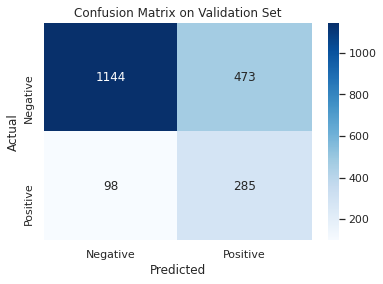

In [36]:
# Downsample the training data using the downsample function
downsampled_train_features, downsampled_train_target = downsample(train_features, train_target, random_state=48)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=77, solver='liblinear')

# Train the model using the downsampled data
log_reg.fit(downsampled_train_features, downsampled_train_target)

# Predict on the validation set
valid_predictions = log_reg.predict(valid_features)

# Calculate the F1 score on the validation set
valid_f1 = f1_score(valid_target, valid_predictions)

# Print the F1 score
print(f"F1 score on validation set: {valid_f1:.4f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(valid_target, valid_predictions)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix on Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Tree with downsampled data

Best F1 Score: 0.5626
Max depth for best F1 score: 5


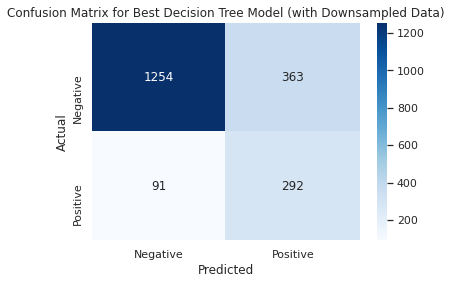

In [37]:
# Initialize variables to track the best model and result
best_f1_score = 0
best_depth = 0
best_tree_model = None

# Loop through depth range to find the best model
for depth in range(1, 20):
    # Create a Decision Tree model with the given depth
    tree_model = DecisionTreeClassifier(random_state=48, max_depth=depth)
    
    # Train the model using the downsampled training data
    tree_model.fit(downsampled_train_features, downsampled_train_target)
    
    # Get predictions for the validation set
    valid_predictions = tree_model.predict(valid_features)
    
    # Calculate F1 score on the validation set
    f1 = f1_score(valid_target, valid_predictions)
    
    # Check if the current F1 score is the best
    if f1 > best_f1_score:
        # Save the best F1 score
        best_f1_score = f1
        # Save the depth corresponding to the best F1 score
        best_depth = depth
        # Save the best model
        best_tree_model = tree_model

# Print the best F1 score and the corresponding max depth
print(f"Best F1 Score: {best_f1_score:.4f}")
print(f"Max depth for best F1 score: {best_depth}")

# Calculate the confusion matrix for the best model on the validation set
conf_matrix = confusion_matrix(valid_target, best_tree_model.predict(valid_features))

# Plot the heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Best Decision Tree Model (with Downsampled Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest with downsampled data

Best F1 Score: 0.5869
Number of estimators for best F1 score: 28


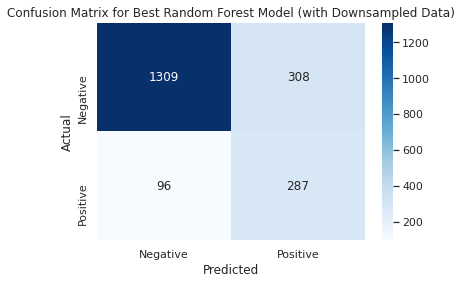

In [38]:
best_f1_score = 0
best_est = 0
best_forest_model = None

# Choose hyperparameter range
for est in range(1, 48):
    # Set the number of trees
    forest_model = RandomForestClassifier(random_state=48, n_estimators=est)
    # Train the model on the downsampled training set
    forest_model.fit(downsampled_train_features, downsampled_train_target)
    
    # Make predictions on the validation set
    valid_predictions = forest_model.predict(valid_features)
    
    # Calculate F1 score on the validation set
    f1 = f1_score(valid_target, valid_predictions)
    
    # Check if the current F1 score is the best
    if f1 > best_f1_score:
        # Save the best F1 score
        best_f1_score = f1
        # Save the number of estimators corresponding to the best F1 score
        best_est = est
        # Save the best model
        best_forest_model = forest_model

# Print the best F1 score and the corresponding number of estimators
print(f"Best F1 Score: {best_f1_score:.4f}")
print(f"Number of estimators for best F1 score: {best_est}")

# Calculate the confusion matrix for the best model on the validation set
conf_matrix = confusion_matrix(valid_target, best_forest_model.predict(valid_features))

# Plot the heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Best Random Forest Model (with Downsampled Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Best model being tested against the test dataset

In [39]:
# Predict on the test set
test_predictions = best_forest_model.predict(test_features)

# Calculate the F1 score on the test set
test_f1_score = f1_score(test_target, test_predictions)

# Print the F1 score on the test set
print(f"F1 score on the test set: {test_f1_score:.4f}")

# Predict the probabilities of positive class on the test set
test_probabilities = best_forest_model.predict_proba(test_features)[:, 1]

# Calculate the ROC AUC score on the test set
test_roc_auc = roc_auc_score(test_target, test_probabilities)

# Print the ROC AUC score on the test set
print(f"ROC AUC score on the test set: {test_roc_auc:.4f}")

F1 score on the test set: 0.5912
ROC AUC score on the test set: 0.8361


We get an f1 score of 0.5912 which is the minimum threshold required. The roc auc value is 0.8361 which indicates that the best performing Random Forest model achieved a relatively high level of discrimination between the positive and negative classes on the test dataset. 

## Conclusion

Based on the comprehensive analysis conducted on the bank's dataset, several key findings and conclusions emerge:

Data Overview: The dataset consists of various features such as credit score, geography, gender, age, tenure, balance, number of products, credit card status, activity status, and estimated salary, along with the target variable indicating whether a customer exited the bank.

Data Distribution:

- The distribution of credit scores is concentrated around 600-700, with a significant spike at around 850.
- The majority of customers are from France, followed by Germany and Spain.
- Most customers use one product, and males outnumber females.
- Approximately 20.4% of customers have exited the bank, while the remaining 79.6% remain.

Model Training:

- Various models were trained using different strategies:
- Logistic regression, decision tree, and random forest models were trained with imbalanced classes, resulting in varying F1 scores.
- Models trained with balanced weight classes showed improved F1 scores compared to imbalanced training.
- Upsampling and downsampling techniques were applied to balance the classes, with random forest models performing well.

Best Model Performance:

- The random forest model trained on upsampled data achieved the highest F1 score (0.5971) and was selected as the best-performing model.
- This model was further evaluated on the test dataset, yielding an F1 score of 0.5912 and an ROC AUC score of 0.8361.

Conclusion:
- The analysis demonstrates the effectiveness of employing machine learning models in predicting customer churn.
- Among the models tested, the random forest model trained on upsampled data exhibited superior performance, showcasing its robustness in handling imbalanced datasets.
- The model's ability to accurately predict customer churn will enable the bank to implement targeted retention strategies and enhance customer satisfaction and loyalty.

Based on the findings, the project effectively optimized the Random Forest model for predicting customer churn at Beta Bank. Initially, training models with imbalanced data led to lower F1 scores and AUC-ROC scores, indicating that handling the class imbalance was necessary for improved performance.

In conclusion, this project showcases the importance of handling imbalanced data and optimizing hyperparameters to improve model performance. By employing these techniques, Beta Bank can leverage the model to proactively manage customer retention and enhance overall profitability.